In [2]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


import numpy as np
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Import and Clean Data

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [3]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [4]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [ ]:
#Get json output of a track - Look at sample output
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
pprint(track)
print('------------------------------------------------------')
pprint(audio_feature)

## Create Dataframes

### Pull data for all for Quarters

In [ ]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary

### Break master dictionary into dataframe for each quarter and combined dataframe

In [12]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])

quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [13]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


# Sample Plots

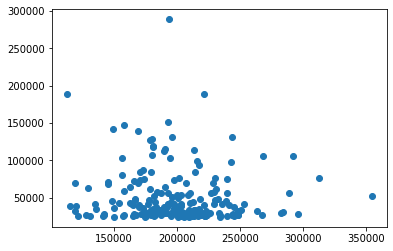

In [10]:
plt.scatter(df_Q1['Duration'], df_Q1['Streams'])
plt.show()

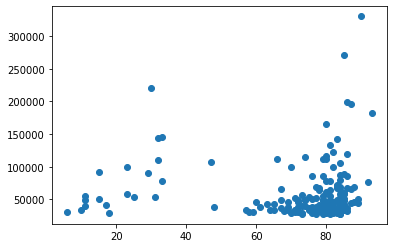

In [11]:
plt.scatter(df_Q2['Popularity'], df_Q2['Streams'])
plt.show()

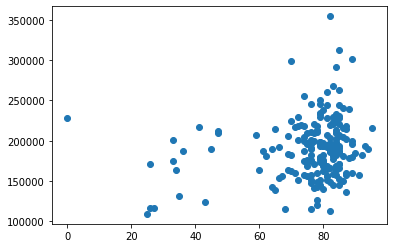

In [12]:
plt.scatter(df_Q3['Popularity'], df_Q3['Duration'])
plt.show()

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Streams'])
rvalue

-0.03060621871702424

# Functions To Be Used In Analysis

In [ ]:
def

# Danceability Analysis

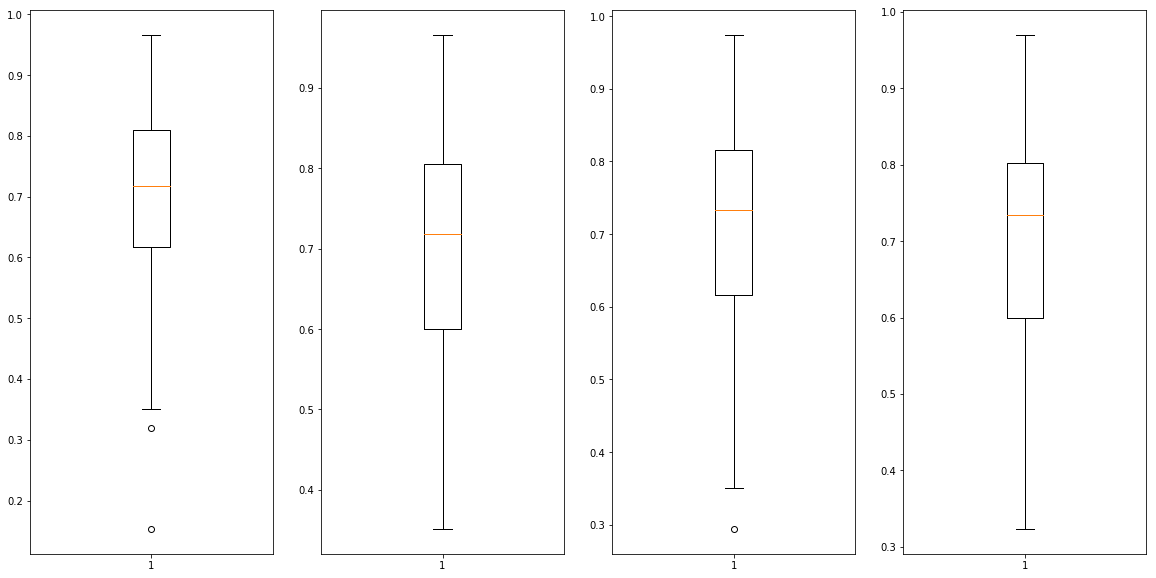

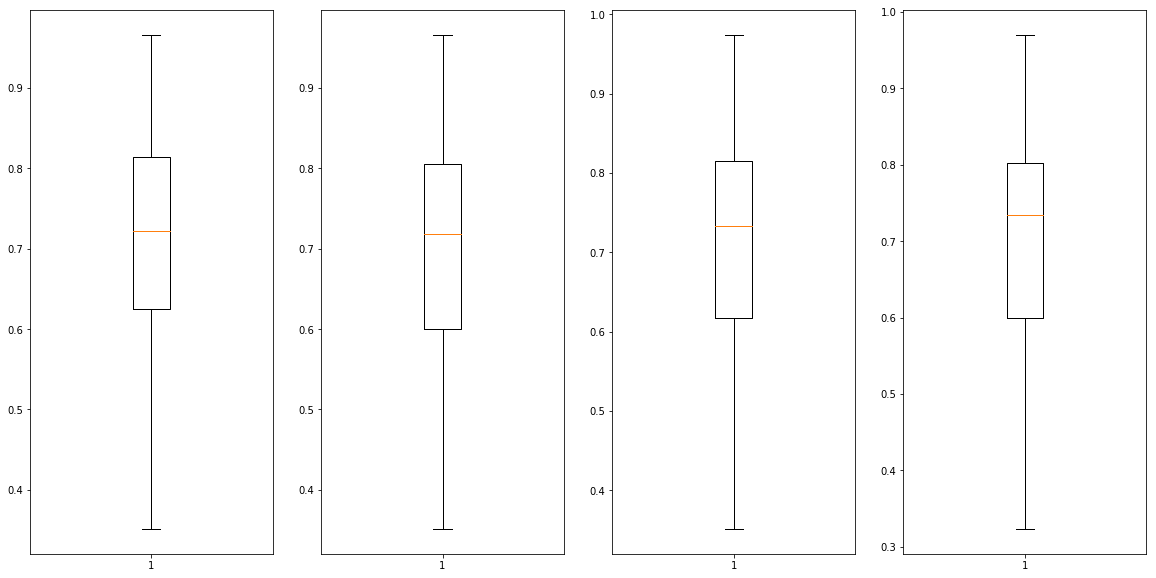

In [14]:
## finding outliers and cleaning up

fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(df_Q1['Danceability'])
ax2.boxplot(df_Q2['Danceability'])
ax3.boxplot(df_Q3['Danceability'])
ax4.boxplot(df_Q4['Danceability'])

#Removing Outliers and creating new data frames for danceability and creating a new box plot
dance_q1=df_Q1[(df_Q1['Danceability']>0.35)]
dance_q2=df_Q2
dance_q3=df_Q3[(df_Q3['Danceability']>0.3)]
dance_q4=df_Q4

fig2, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs
plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(dance_q1['Danceability'])
ax2.boxplot(dance_q2['Danceability'])
ax3.boxplot(dance_q3['Danceability'])
ax4.boxplot(dance_q4['Danceability'])



plt.show()

The correlation coefficient between Q1 Danceability and Popularity is -0.08
The correlation coefficient between Q2 Danceability and Popularity is -0.1
The correlation coefficient between Q3 Danceability and Popularity is 0.02
The correlation coefficient between Q4 Danceability and Popularity is -0.0


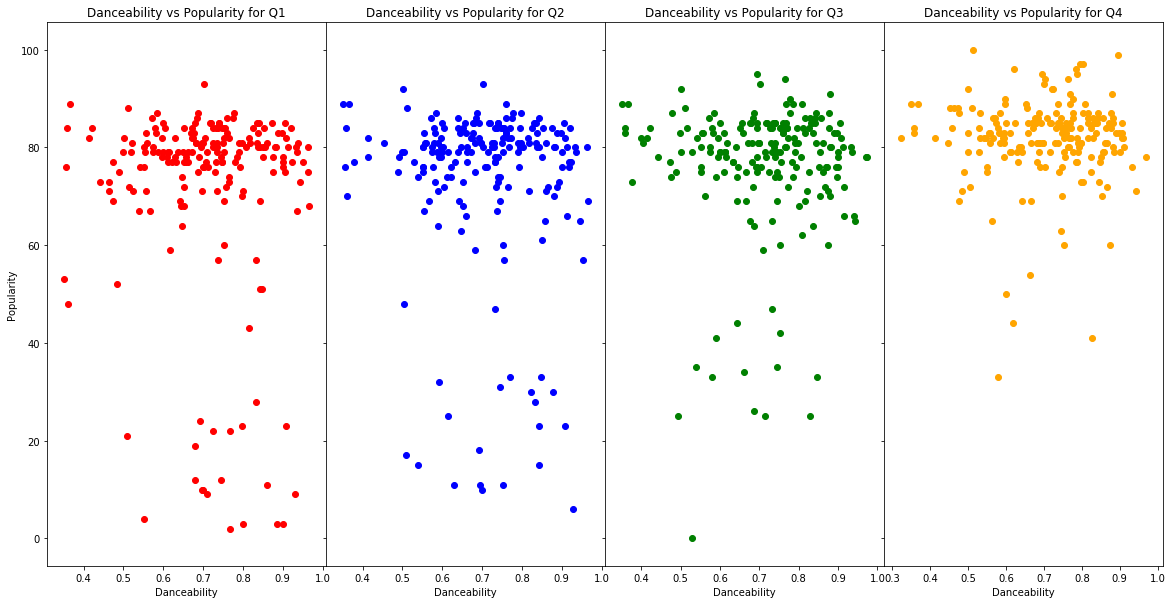

In [16]:
# Finding any possible correlation between dancibility and popularity

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(dance_q1['Danceability'], dance_q1['Popularity'],color='red')
ax2.scatter(dance_q2['Danceability'], dance_q2['Popularity'],color='blue')
ax3.scatter(dance_q3['Danceability'], dance_q3['Popularity'],color='green')
ax4.scatter(dance_q4['Danceability'], dance_q4['Popularity'],color='orange')

ax1.set_title('Danceability vs Popularity for Q1')
ax2.set_title('Danceability vs Popularity for Q2')
ax3.set_title('Danceability vs Popularity for Q3')
ax4.set_title('Danceability vs Popularity for Q4')

ax1.set_xlabel('Danceability')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Danceability')
ax3.set_xlabel('Danceability')
ax4.set_xlabel('Danceability')

print(f"The correlation coefficient between Q1 Danceability and Popularity is {round(pearsonr(dance_q1['Danceability'],dance_q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Danceability and Popularity is {round(pearsonr(dance_q2['Danceability'],dance_q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Danceability and Popularity is {round(pearsonr(dance_q3['Danceability'],dance_q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Danceability and Popularity is {round(pearsonr(dance_q4['Danceability'],dance_q4['Popularity'])[0],2)}")

The correlation coefficient between Q1 Danceability and Streams is 0.12
The correlation coefficient between Q2 Danceability and Streams is 0.14
The correlation coefficient between Q3 Danceability and Streams is 0.01
The correlation coefficient between Q4 Danceability and Streams is 0.01


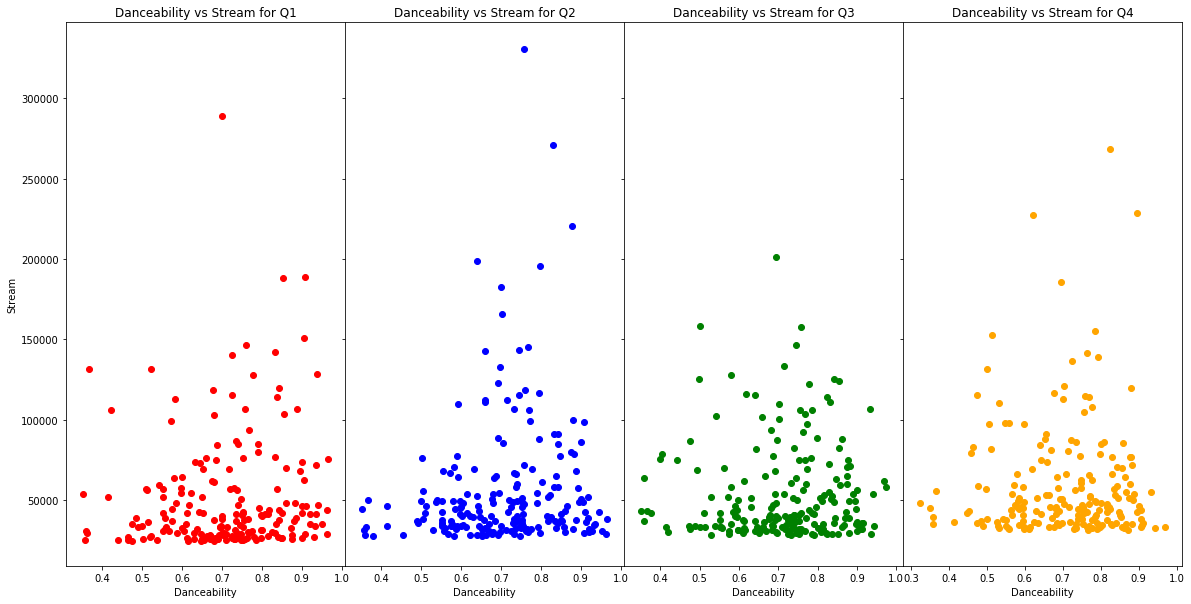

In [16]:
#Finding any possible correlation between dancibility and steams

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.scatter(dance_q1['Danceability'], dance_q1['Streams'],color='red')
ax2.scatter(dance_q2['Danceability'], dance_q2['Streams'],color='blue')
ax3.scatter(dance_q3['Danceability'], dance_q3['Streams'],color='green')
ax4.scatter(dance_q4['Danceability'], dance_q4['Streams'],color='orange')

ax1.set_title('Danceability vs Stream for Q1')
ax2.set_title('Danceability vs Stream for Q2')
ax3.set_title('Danceability vs Stream for Q3')
ax4.set_title('Danceability vs Stream for Q4')

ax1.set_xlabel('Danceability')
ax1.set_ylabel('Stream')
ax2.set_xlabel('Danceability')
ax3.set_xlabel('Danceability')
ax4.set_xlabel('Danceability')


print(f"The correlation coefficient between Q1 Danceability and Streams is {round(pearsonr(dance_q1['Danceability'],dance_q1['Streams'])[0],2)}")
print(f"The correlation coefficient between Q2 Danceability and Streams is {round(pearsonr(dance_q2['Danceability'],dance_q2['Streams'])[0],2)}")
print(f"The correlation coefficient between Q3 Danceability and Streams is {round(pearsonr(dance_q3['Danceability'],dance_q3['Streams'])[0],2)}")
print(f"The correlation coefficient between Q4 Danceability and Streams is {round(pearsonr(dance_q4['Danceability'],dance_q4['Streams'])[0],2)}")

Text(0.5, 0, 'Danceability')

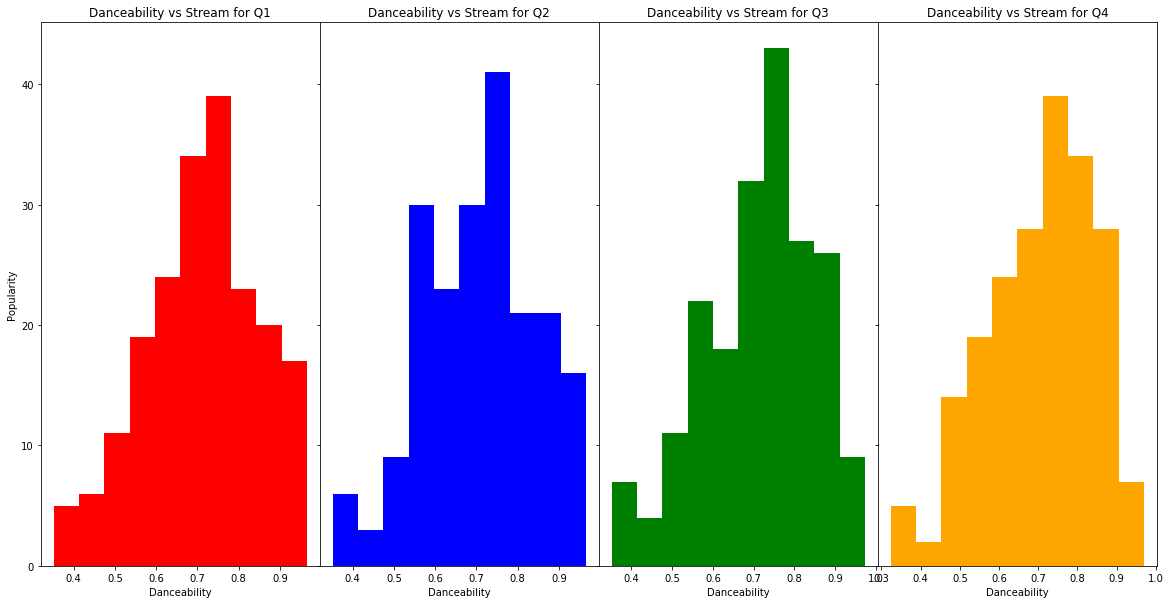

In [17]:
#Analyzing danceability bar charts

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.hist(dance_q1['Danceability'],color='red')
ax2.hist(dance_q2['Danceability'],color='blue')
ax3.hist(dance_q3['Danceability'],color='green')
ax4.hist(dance_q4['Danceability'],color='orange')

ax1.set_title('Danceability vs Stream for Q1')
ax2.set_title('Danceability vs Stream for Q2')
ax3.set_title('Danceability vs Stream for Q3')
ax4.set_title('Danceability vs Stream for Q4')

ax1.set_xlabel('Danceability')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Danceability')
ax3.set_xlabel('Danceability')
ax4.set_xlabel('Danceability')


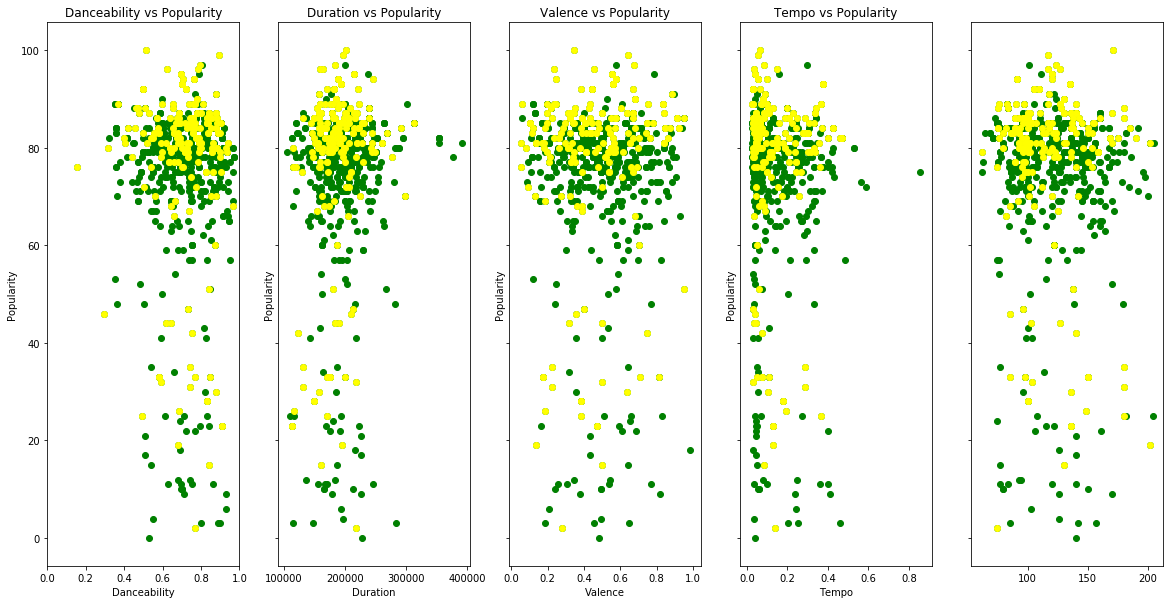

In [19]:
## finding top 50 tracks of each quarter and group them for the entire year

top_50_q1=df_Q1.head(50)
top_50_q2=df_Q2.head(50)
top_50_q3=df_Q3.head(50)
top_50_q4=df_Q4.head(50)
frames=[top_50_q1,top_50_q2,top_50_q3,top_50_q4]
top_50_year=pd.concat(frames)

#Combining all top 200 songs into one data frame for the entire year and take the list minus the first 50

frames_year=[df_Q1,df_Q2,df_Q3,df_Q4]
top_200_year=pd.concat(frames_year)

#Plotting data

fig2, axs = plt.subplots(1,5,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0.2},figsize=(20,10))
ax1, ax2, ax3, ax4, ax5 = axs

#Plotting Danceability versus Popularity
ax1.scatter(top_200_year['Danceability'], top_200_year['Popularity'],color='green')
ax1.scatter(top_50_year['Danceability'], top_50_year['Popularity'],color='yellow')
ax1.set_title('Danceability vs Popularity')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Popularity')
ax1.set_xlim(0,1)


#Plotting Duration versus Popularity
ax2.scatter(top_200_year['Duration'], top_200_year['Popularity'],color='green')
ax2.scatter(top_50_year['Duration'], top_50_year['Popularity'],color='yellow')
ax2.set_title('Duration vs Popularity')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Popularity')



ax3.scatter(top_200_year['Valence'], top_200_year['Popularity'],color='green')
ax3.scatter(top_50_year['Valence'], top_50_year['Popularity'],color='yellow')
ax3.set_title('Valence vs Popularity')
ax3.set_xlabel('Valence')
ax3.set_ylabel('Popularity')


ax4.scatter(top_200_year['Speechiness'], top_200_year['Popularity'],color='green')
ax4.scatter(top_50_year['Speechiness'], top_50_year['Popularity'],color='yellow')
ax4.set_title('Dpeechiness vs Popularity')
ax4.set_xlabel('Speechiness')
ax4.set_ylabel('Popularity')

ax5.scatter(top_200_year['Tempo'], top_200_year['Popularity'],color='green')
ax5.scatter(top_50_year['Tempo'], top_50_year['Popularity'],color='yellow')
ax4.set_title('Tempo vs Popularity')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Popularity')

plt.show()

In [22]:
#ANOVA for danceability for each quarter
group_dance_Q1 = df_Q1["Danceability"]
group_dance_Q2 = df_Q2["Danceability"]
group_dance_Q3 = df_Q3["Danceability"]
group_dance_Q4 = df_Q4["Danceability"]

f_oneway(group_dance_Q1,group_dance_Q2,group_dance_Q3,group_dance_Q4)


F_onewayResult(statistic=0.08490765223875946, pvalue=0.968284960476382)

Results shows that there is no statistically significant difference between Dacnceability amongst the 4 quarters

In [23]:
#ANOVA for danceability for each quarter

#take the first 50 for Q1 for ANOVA:
top_50_Q1_dance=group_dance_Q1.head(50)
#Run ANOVA for top 50 versus the 200
f_oneway(group_dance_Q1,top_50_Q1_dance)


F_onewayResult(statistic=0.3205114707785049, pvalue=0.5718123547920076)

Results shows that there is no statistically significant difference between Dacnceability of first 50 songs of Q1 and the remainder of Q1

# Speechiness Analysis

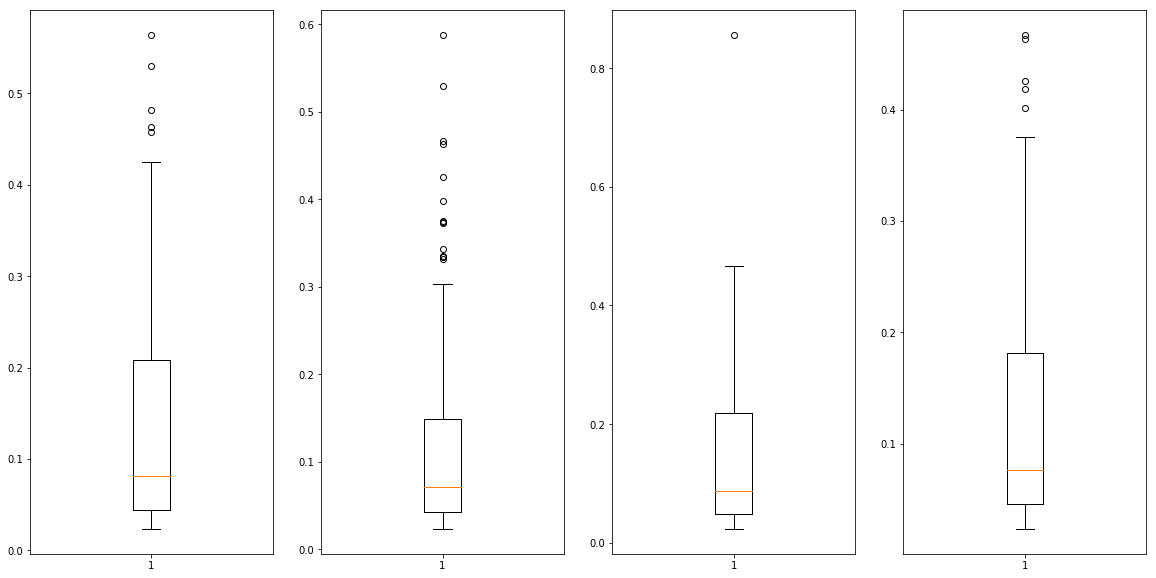

In [18]:
fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(df_Q1['Speechiness'])
ax2.boxplot(df_Q2['Speechiness'])
ax3.boxplot(df_Q3['Speechiness'])
ax4.boxplot(df_Q4['Speechiness'])

plt.show()

The correlation coefficient between Q1 Speechiness and Popularity is -0.13
The correlation coefficient between Q2 Speechiness and Popularity is 0.01
The correlation coefficient between Q3 Speechiness and Popularity is -0.02
The correlation coefficient between Q4 Speechiness and Popularity is 0.02


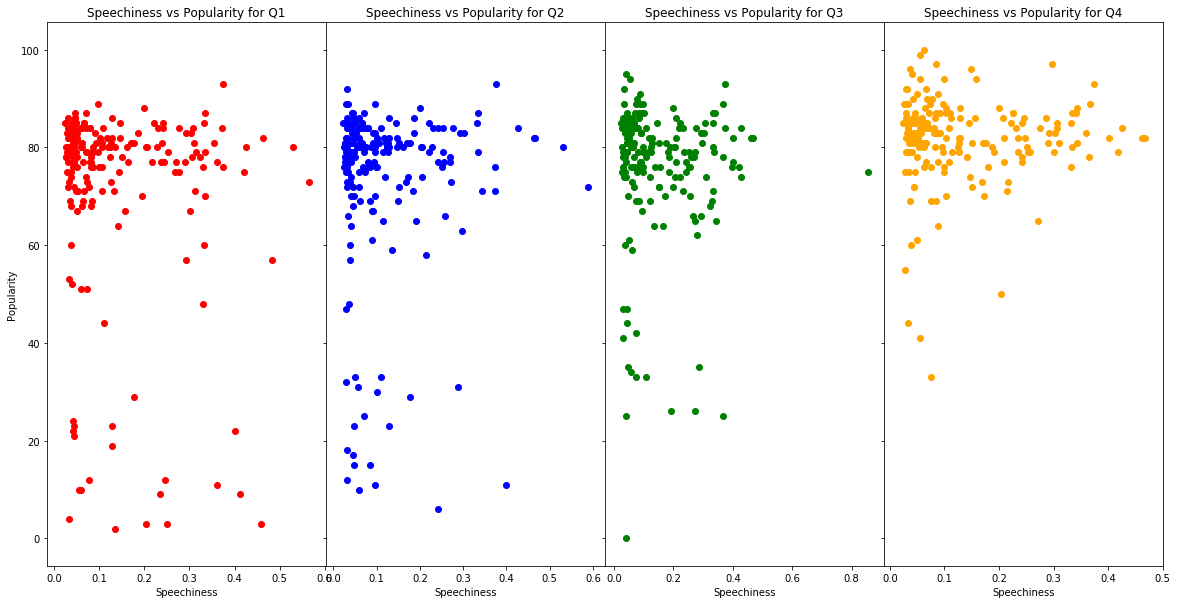

In [20]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Popularity'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Popularity'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Popularity'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Popularity'],color='orange')

ax1.set_title('Speechiness vs Popularity for Q1')
ax2.set_title('Speechiness vs Popularity for Q2')
ax3.set_title('Speechiness vs Popularity for Q3')
ax4.set_title('Speechiness vs Popularity for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Popularity is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Popularity is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Popularity is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Popularity is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Popularity'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Valence is -0.02
The correlation coefficient between Q2 Speechiness and Valence is -0.05
The correlation coefficient between Q3 Speechiness and Valence is 0.17
The correlation coefficient between Q4 Speechiness and Valence is 0.04


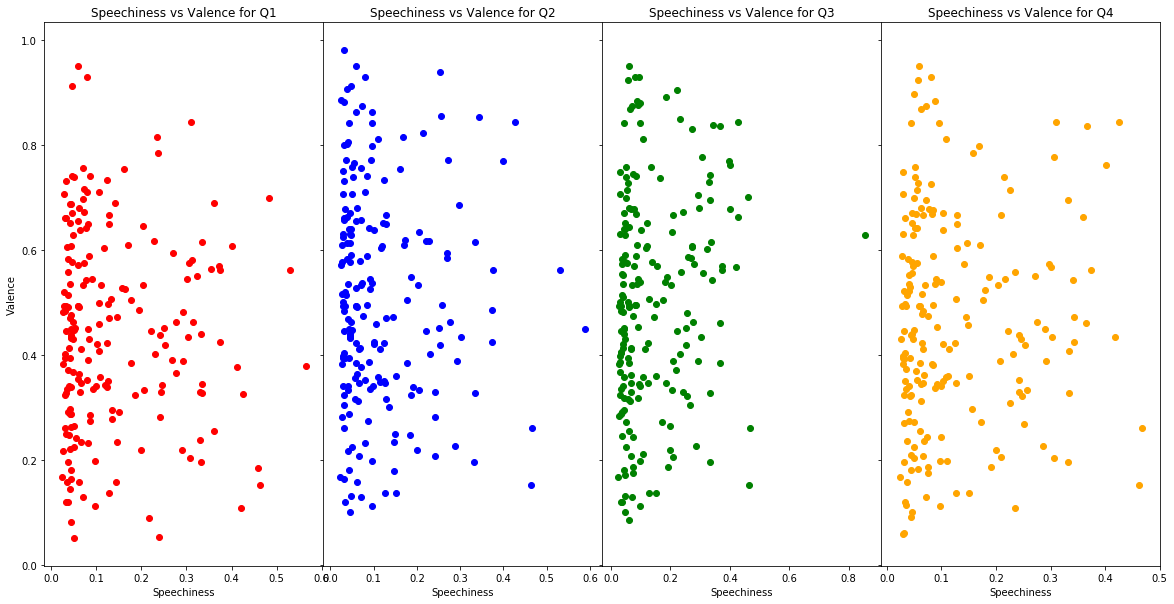

In [23]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Valence'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Valence'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Valence'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Valence'],color='orange')

ax1.set_title('Speechiness vs Valence for Q1')
ax2.set_title('Speechiness vs Valence for Q2')
ax3.set_title('Speechiness vs Valence for Q3')
ax4.set_title('Speechiness vs Valence for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Valence')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Valence is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Valence'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Valence is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Valence'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Valence is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Valence'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Valence is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Valence'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Popularity is -0.23
The correlation coefficient between Q2 Speechiness and Popularity is -0.2
The correlation coefficient between Q3 Speechiness and Popularity is -0.25
The correlation coefficient between Q4 Speechiness and Popularity is -0.28


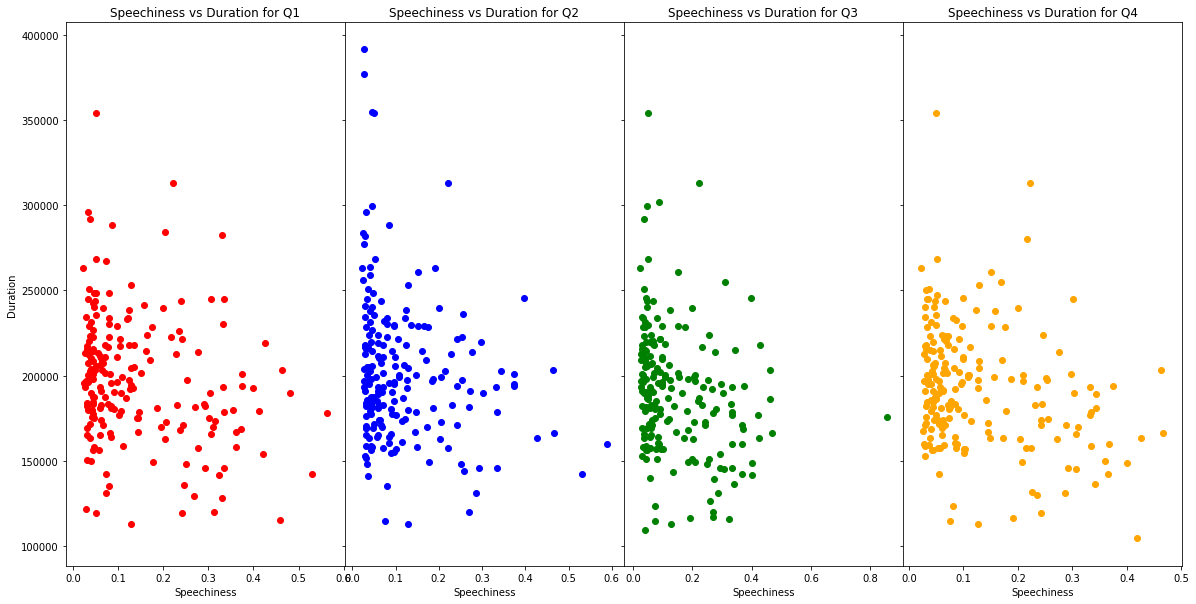

In [19]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Duration'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Duration'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Duration'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Duration'],color='orange')

ax1.set_title('Speechiness vs Duration for Q1')
ax2.set_title('Speechiness vs Duration for Q2')
ax3.set_title('Speechiness vs Duration for Q3')
ax4.set_title('Speechiness vs Duration for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Duration')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Popularity is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Duration'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Popularity is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Duration'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Popularity is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Duration'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Popularity is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Duration'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Danceability is 0.35
The correlation coefficient between Q2 Speechiness and Danceability is 0.34
The correlation coefficient between Q3 Speechiness and Danceability is 0.24
The correlation coefficient between Q4 Speechiness and Danceability is 0.27


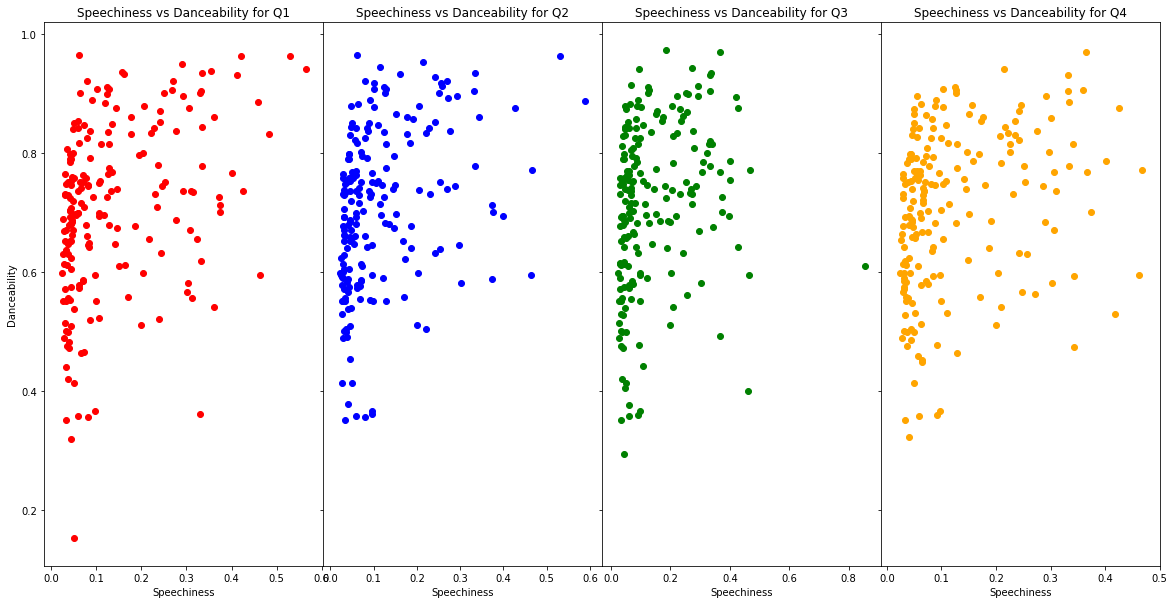

In [22]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Danceability'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Danceability'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Danceability'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Danceability'],color='orange')

ax1.set_title('Speechiness vs Danceability for Q1')
ax2.set_title('Speechiness vs Danceability for Q2')
ax3.set_title('Speechiness vs Danceability for Q3')
ax4.set_title('Speechiness vs Danceability for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Danceability')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Danceability is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Danceability is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Danceability is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Danceability is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Danceability'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Streams is 0.17
The correlation coefficient between Q2 Speechiness and Streams is -0.01
The correlation coefficient between Q3 Speechiness and Streams is -0.02
The correlation coefficient between Q4 Speechiness and Streams is -0.07


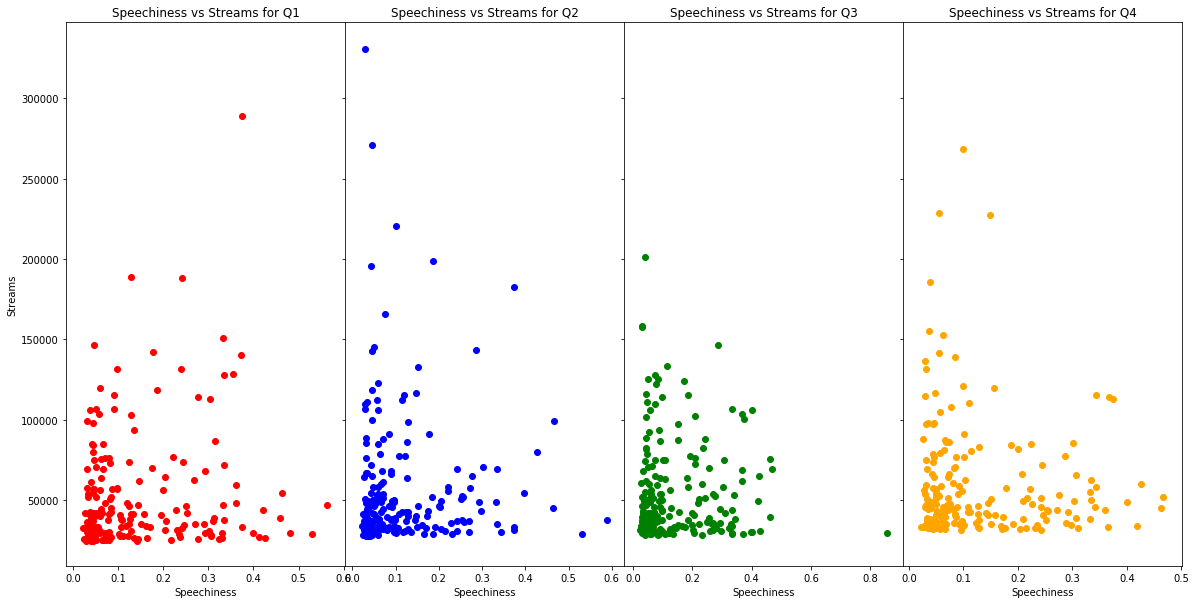

In [24]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Streams'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Streams'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Streams'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Streams'],color='orange')

ax1.set_title('Speechiness vs Streams for Q1')
ax2.set_title('Speechiness vs Streams for Q2')
ax3.set_title('Speechiness vs Streams for Q3')
ax4.set_title('Speechiness vs Streams for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Streams')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Streams is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Streams'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Streams is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Streams'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Streams is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Streams'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Streams is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Streams'])[0],2)}")

In [25]:
#ANOVA for Speechiness for each quarter
group_speech_Q1 = df_Q1["Speechiness"]
group_speech_Q2 = df_Q2["Speechiness"]
group_speech_Q3 = df_Q3["Speechiness"]
group_speech_Q4 = df_Q4["Speechiness"]

f_oneway(group_speech_Q1,group_speech_Q2,group_speech_Q3,group_speech_Q4)


F_onewayResult(statistic=2.2297619517309726, pvalue=0.08335865914750178)

Results shows that there is no statistically significant difference between Speechiness amongst the 4 quarters

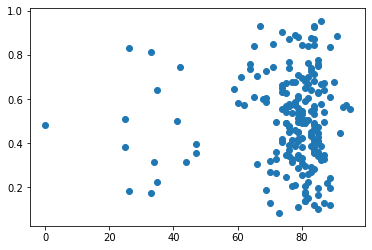

In [14]:
plt.scatter(df_Q3['Popularity'], df_Q3['Valence'])
plt.show()

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Valence'])
rvalue

-0.06394064045962573

# Valence and Popularity

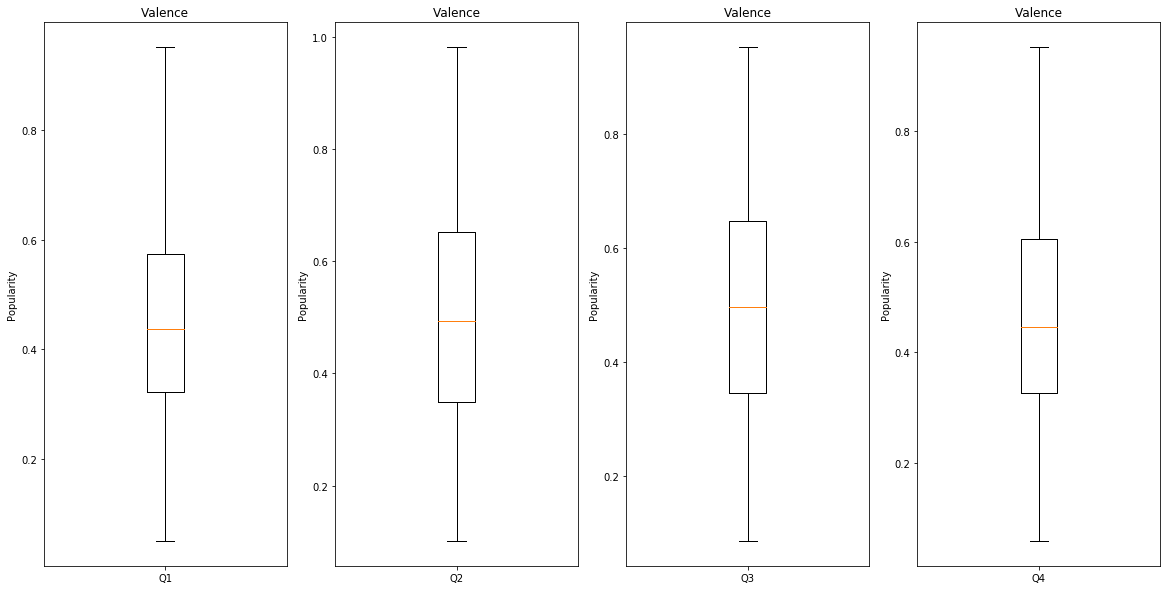

{'whiskers': [<matplotlib.lines.Line2D at 0x12aa2d7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x12aa2de48>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a9f1be0>],
 'medians': [<matplotlib.lines.Line2D at 0x12aa38518>],
 'fliers': [<matplotlib.lines.Line2D at 0x12aa38860>],
 'means': []}

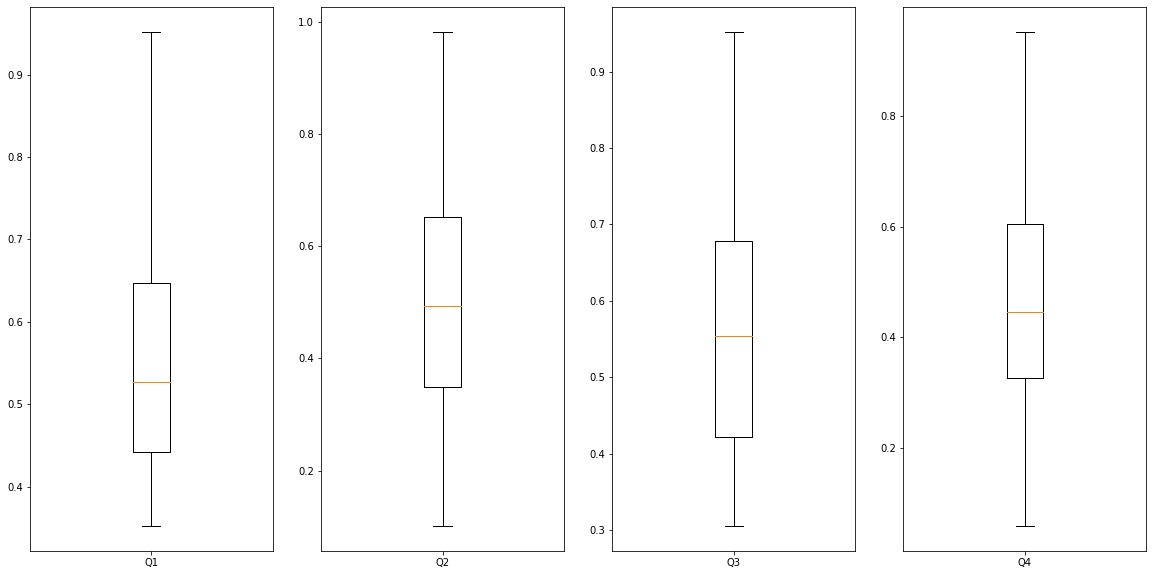

In [16]:

## finding outliers and cleaning up

fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs


plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(df_Q1['Valence'])
ax2.boxplot(df_Q2['Valence'])
ax3.boxplot(df_Q3['Valence'])
ax4.boxplot(df_Q4['Valence'])

ax1.set_title('Valence')
ax1.set_ylabel('Popularity')
ax2.set_title('Valence')
ax2.set_ylabel('Popularity')
ax3.set_title('Valence')
ax3.set_ylabel('Popularity')
ax4.set_title('Valence')
ax4.set_ylabel('Popularity')
plt.show()

#Removing Outliers and creating new data frames for danceability and creating a new box plot
Valence_q1=df_Q1[(df_Q1['Valence']>0.35)]
Valence_q2=df_Q2
Valence_q3=df_Q3[(df_Q3['Valence']>0.3)]
Valence_q4=df_Q4

fig2, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs
plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(Valence_q1['Valence'])
ax2.boxplot(Valence_q2['Valence'])
ax3.boxplot(Valence_q3['Valence'])
ax4.boxplot(Valence_q4['Valence'])


The correlation coefficient between Q1 Valence and Popularity is -0.0
The correlation coefficient between Q2 Valence and Popularity is -0.06
The correlation coefficient between Q3 Valence and Popularity is 0.02
The correlation coefficient between Q4 Valence and Popularity is 0.05


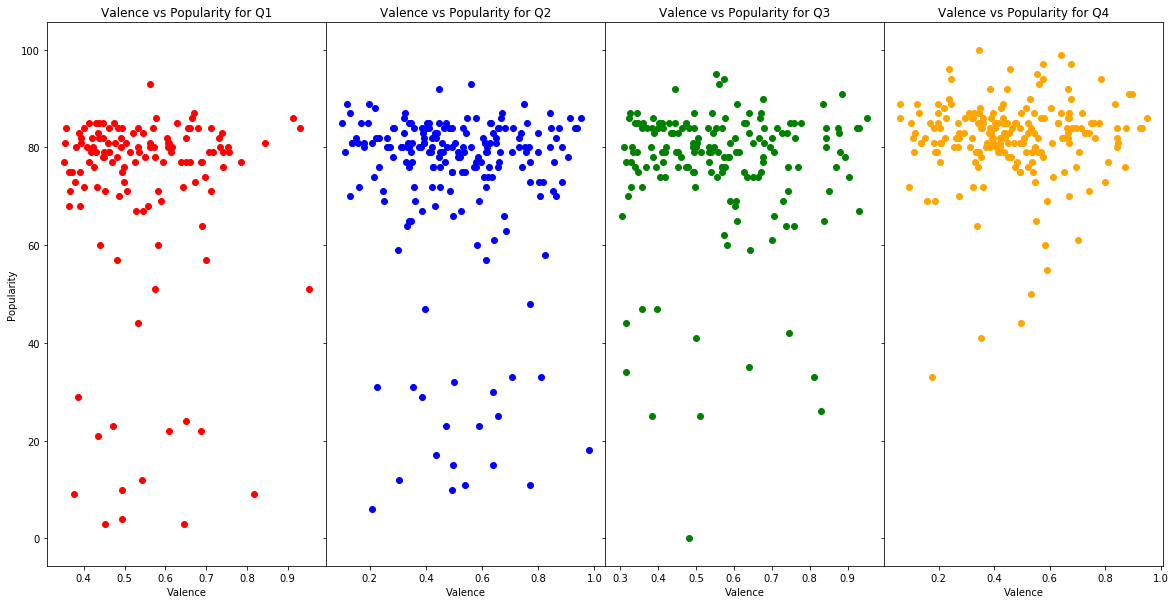

In [17]:

# Finding any possible correlation between Valence and popularity

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(Valence_q1['Valence'], Valence_q1['Popularity'],color='red')
ax2.scatter(Valence_q2['Valence'], Valence_q2['Popularity'],color='blue')
ax3.scatter(Valence_q3['Valence'], Valence_q3['Popularity'],color='green')
ax4.scatter(Valence_q4['Valence'], Valence_q4['Popularity'],color='orange')

ax1.set_title('Valence vs Popularity for Q1')
ax2.set_title('Valence vs Popularity for Q2')
ax3.set_title('Valence vs Popularity for Q3')
ax4.set_title('Valence vs Popularity for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')

print(f"The correlation coefficient between Q1 Valence and Popularity is {round(pearsonr(Valence_q1['Valence'],Valence_q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Valence and Popularity is {round(pearsonr(Valence_q2['Valence'],Valence_q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Valence and Popularity is {round(pearsonr(Valence_q3['Valence'],Valence_q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Valence and Popularity is {round(pearsonr(Valence_q4['Valence'],Valence_q4['Popularity'])[0],2)}")

The correlation coefficient between Q1 Valence and Tempo is 0.08
The correlation coefficient between Q2 Valence and Tempo is 0.0
The correlation coefficient between Q3 Valence and Tempo is 0.09
The correlation coefficient between Q4 Valence and Tempo is -0.06


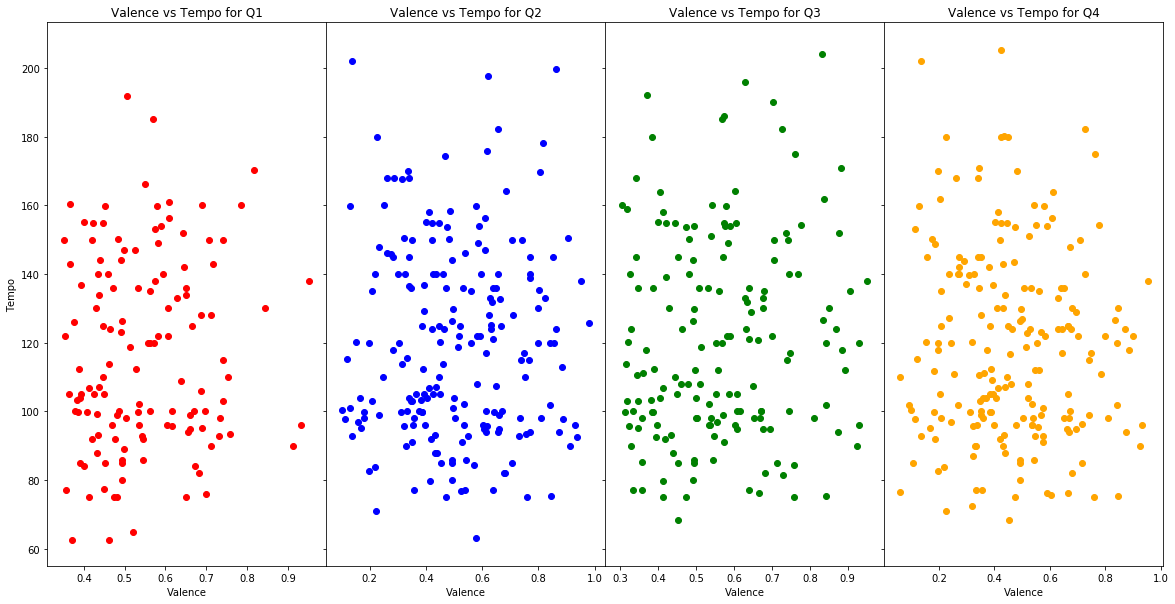

In [18]:
#Finding any possible correlation between Valence and Tempo

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.scatter(Valence_q1['Valence'], Valence_q1['Tempo'],color='red')
ax2.scatter(Valence_q2['Valence'], Valence_q2['Tempo'],color='blue')
ax3.scatter(Valence_q3['Valence'], Valence_q3['Tempo'],color='green')
ax4.scatter(Valence_q4['Valence'], Valence_q4['Tempo'],color='orange')

ax1.set_title('Valence vs Tempo for Q1')
ax2.set_title('Valence vs Tempo for Q2')
ax3.set_title('Valence vs Tempo for Q3')
ax4.set_title('Valence vs Tempo for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Tempo')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')


print(f"The correlation coefficient between Q1 Valence and Tempo is {round(pearsonr(Valence_q1['Valence'],Valence_q1['Tempo'])[0],2)}")
print(f"The correlation coefficient between Q2 Valence and Tempo is {round(pearsonr(Valence_q2['Valence'],Valence_q2['Tempo'])[0],2)}")
print(f"The correlation coefficient between Q3 Valence and Tempo is {round(pearsonr(Valence_q3['Valence'],Valence_q3['Tempo'])[0],2)}")
print(f"The correlation coefficient between Q4 Valence and Tempo is {round(pearsonr(Valence_q4['Valence'],Valence_q4['Tempo'])[0],2)}")

The correlation coefficient between Q1 Valence and Streams is 0.18
The correlation coefficient between Q2 Valence and Streams is 0.14
The correlation coefficient between Q3 Valence and Streams is -0.01
The correlation coefficient between Q4 Valence and Streams is 0.01


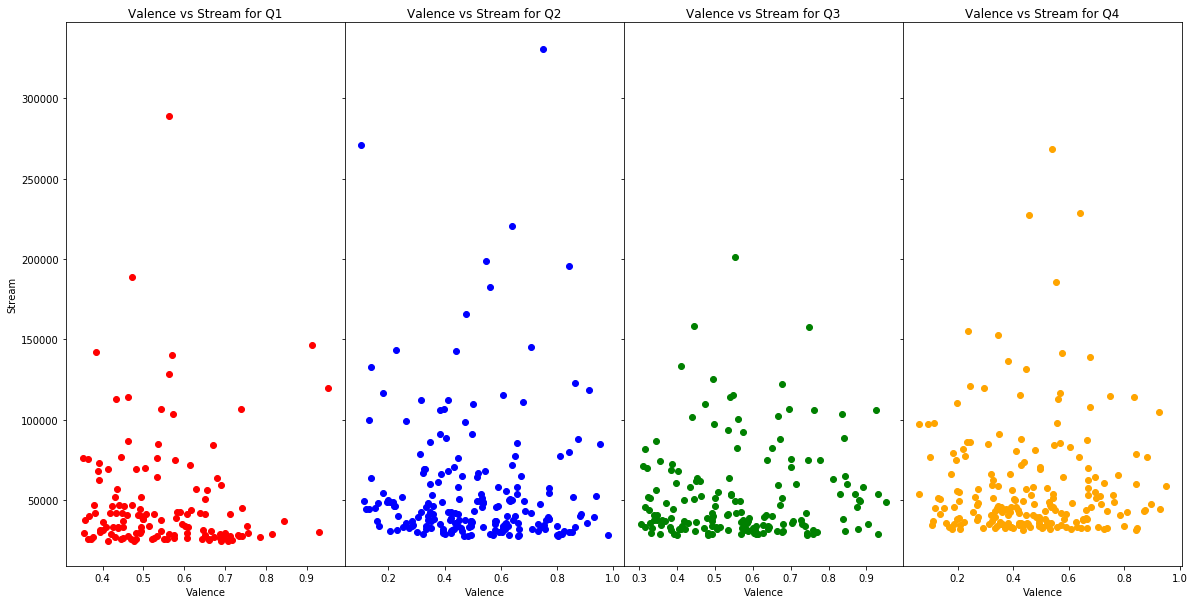

In [19]:
#Finding any possible correlation between Valence and Streams
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.scatter(Valence_q1['Valence'], Valence_q1['Streams'],color='red')
ax2.scatter(Valence_q2['Valence'], Valence_q2['Streams'],color='blue')
ax3.scatter(Valence_q3['Valence'], Valence_q3['Streams'],color='green')
ax4.scatter(Valence_q4['Valence'], Valence_q4['Streams'],color='orange')

ax1.set_title('Valence vs Stream for Q1')
ax2.set_title('Valence vs Stream for Q2')
ax3.set_title('Valence vs Stream for Q3')
ax4.set_title('Valence vs Stream for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Stream')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')


print(f"The correlation coefficient between Q1 Valence and Streams is {round(pearsonr(Valence_q1['Danceability'],Valence_q1['Streams'])[0],2)}")
print(f"The correlation coefficient between Q2 Valence and Streams is {round(pearsonr(Valence_q2['Danceability'],Valence_q2['Streams'])[0],2)}")
print(f"The correlation coefficient between Q3 Valence and Streams is {round(pearsonr(Valence_q3['Danceability'],Valence_q3['Streams'])[0],2)}")
print(f"The correlation coefficient between Q4 Valence and Streams is {round(pearsonr(Valence_q4['Danceability'],Valence_q4['Streams'])[0],2)}")

The correlation coefficient between Q1 Valence and Danceability is 0.02
The correlation coefficient between Q2 Valence and Danceability is 0.05
The correlation coefficient between Q3 Valence and Danceability is 0.26
The correlation coefficient between Q4 Valence and Danceability is 0.3


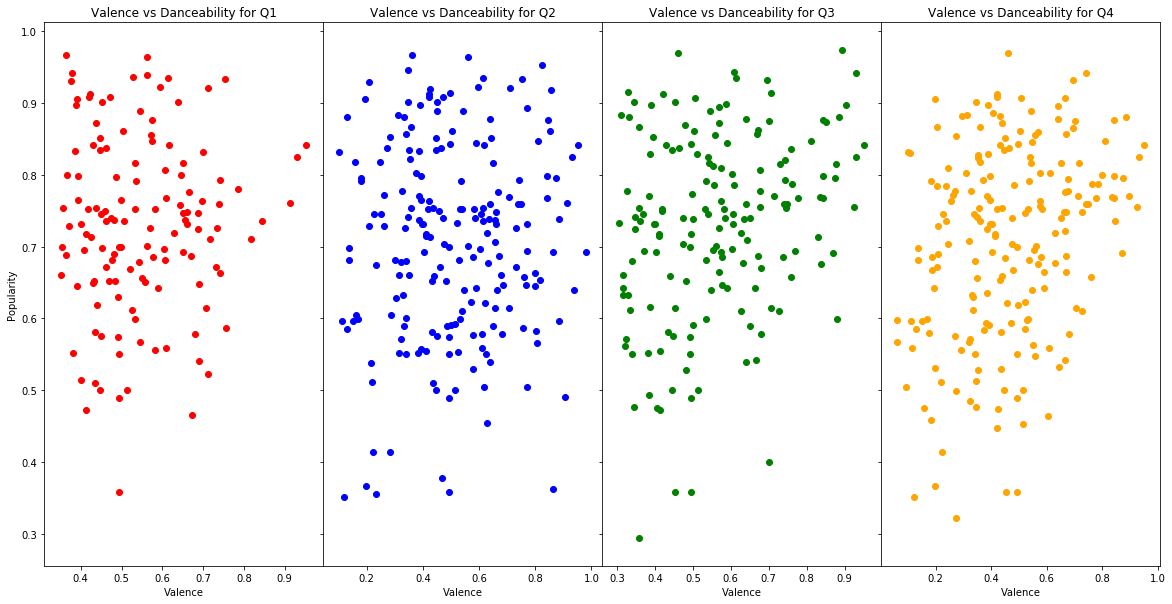

In [20]:
# Finding any possible correlation between Valence and Danceability 

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(Valence_q1['Valence'], Valence_q1['Danceability'],color='red')
ax2.scatter(Valence_q2['Valence'], Valence_q2['Danceability'],color='blue')
ax3.scatter(Valence_q3['Valence'], Valence_q3['Danceability'],color='green')
ax4.scatter(Valence_q4['Valence'], Valence_q4['Danceability'],color='orange')

ax1.set_title('Valence vs Danceability for Q1')
ax2.set_title('Valence vs Danceability for Q2')
ax3.set_title('Valence vs Danceability for Q3')
ax4.set_title('Valence vs Danceability for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')

print(f"The correlation coefficient between Q1 Valence and Danceability is {round(pearsonr(Valence_q1['Valence'],Valence_q1['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q2 Valence and Danceability is {round(pearsonr(Valence_q2['Valence'],Valence_q2['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q3 Valence and Danceability is {round(pearsonr(Valence_q3['Valence'],Valence_q3['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q4 Valence and Danceability is {round(pearsonr(Valence_q4['Valence'],Valence_q4['Danceability'])[0],2)}")

The correlation coefficient between Q1 Valence and Duration is 0.06
The correlation coefficient between Q2 Valence and Duration is -0.05
The correlation coefficient between Q3 Valence and Duration is -0.14
The correlation coefficient between Q4 Valence and Duration is -0.12


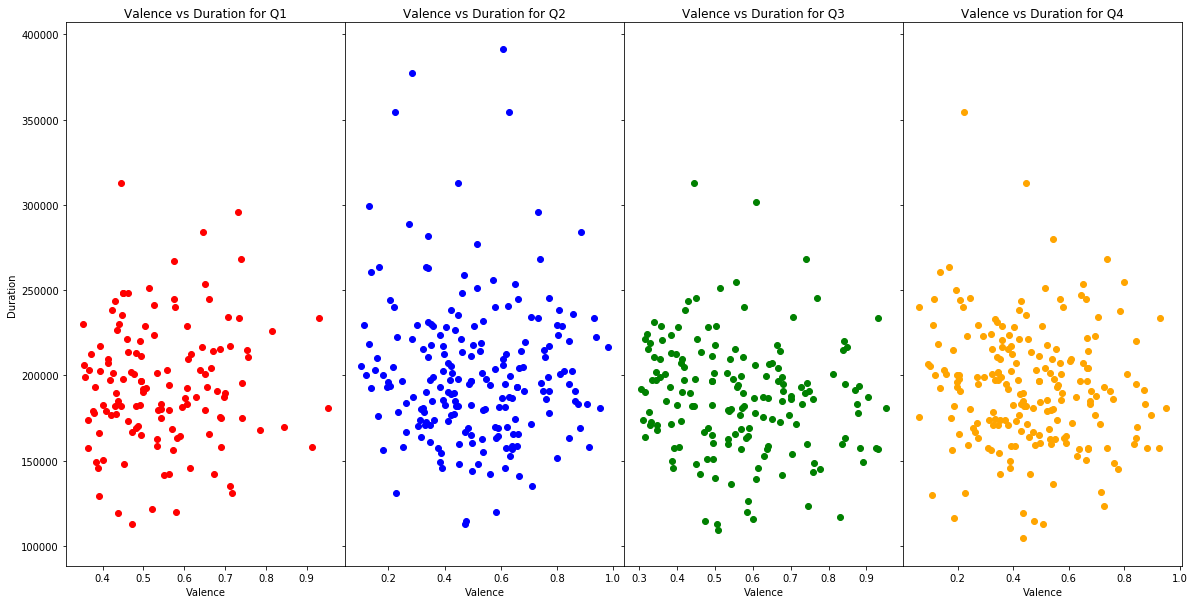

In [35]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(Valence_q1['Valence'], Valence_q1['Duration'],color='red')
ax2.scatter(Valence_q2['Valence'], Valence_q2['Duration'],color='blue')
ax3.scatter(Valence_q3['Valence'], Valence_q3['Duration'],color='green')
ax4.scatter(Valence_q4['Valence'], Valence_q4['Duration'],color='orange')

ax1.set_title('Valence vs Duration for Q1')
ax2.set_title('Valence vs Duration for Q2')
ax3.set_title('Valence vs Duration for Q3')
ax4.set_title('Valence vs Duration for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Duration')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')

print(f"The correlation coefficient between Q1 Valence and Duration is {round(pearsonr(Valence_q1['Valence'],Valence_q1['Duration'])[0],2)}")
print(f"The correlation coefficient between Q2 Valence and Duration is {round(pearsonr(Valence_q2['Valence'],Valence_q2['Duration'])[0],2)}")
print(f"The correlation coefficient between Q3 Valence and Duration is {round(pearsonr(Valence_q3['Valence'],Valence_q3['Duration'])[0],2)}")
print(f"The correlation coefficient between Q4 Valence and Duration is {round(pearsonr(Valence_q4['Valence'],Valence_q4['Duration'])[0],2)}")

Text(0.5, 0, 'Valence')

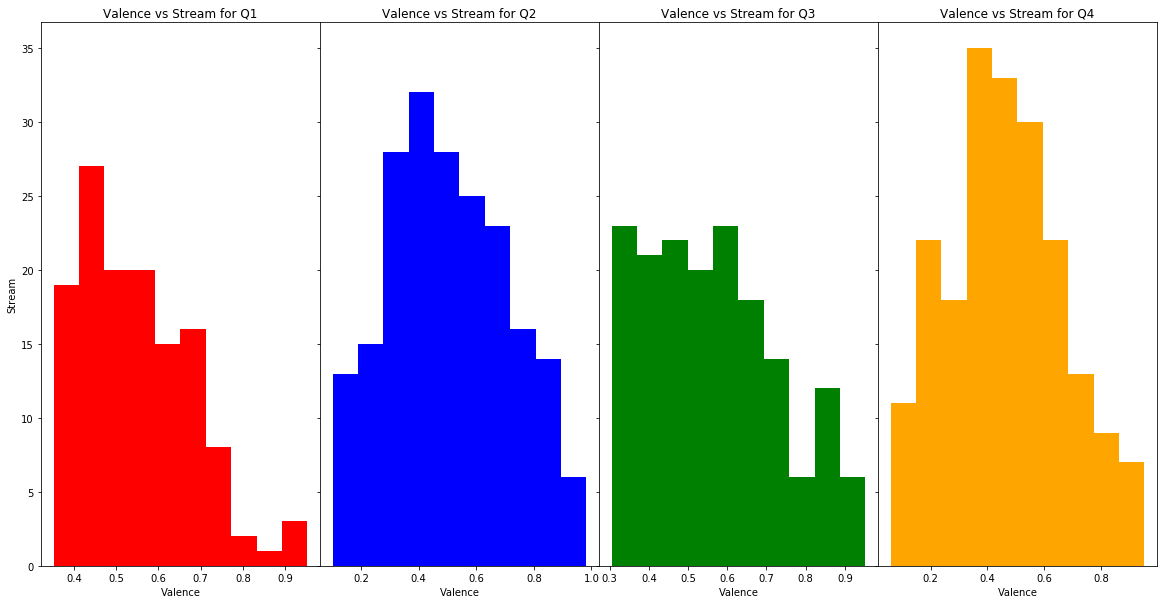

In [34]:
#Analyzing danceability bar charts

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.hist(Valence_q1['Valence'],color='red')
ax2.hist(Valence_q2['Valence'],color='blue')
ax3.hist(Valence_q3['Valence'],color='green')
ax4.hist(Valence_q4['Valence'],color='orange')

ax1.set_title('Valence vs Stream for Q1')
ax2.set_title('Valence vs Stream for Q2')
ax3.set_title('Valence vs Stream for Q3')
ax4.set_title('Valence vs Stream for Q4')

ax1.set_xlabel('Valence')
ax1.set_ylabel('Stream')
ax2.set_xlabel('Valence')
ax3.set_xlabel('Valence')
ax4.set_xlabel('Valence')

(0, 1)

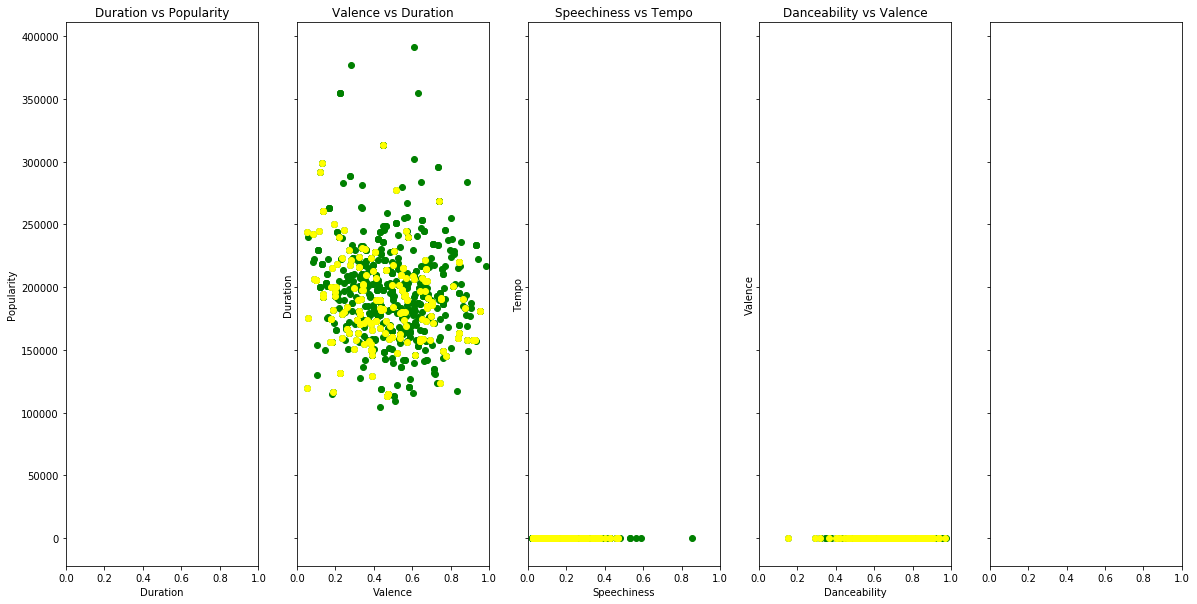

In [37]:
## finding top 50 tracks of each quarter and group them for the entire year

top_50_q1=df_Q1.head(50)
top_50_q2=df_Q2.head(50)
top_50_q3=df_Q3.head(50)
top_50_q4=df_Q4.head(50)
frames=[top_50_q1,top_50_q2,top_50_q3,top_50_q4]
top_50_year=pd.concat(frames)

#Combining all top 200 songs into one data frame for the entire year and take the list minus the first 50

frames_year=[df_Q1,df_Q2,df_Q3,df_Q4]
top_200_year=pd.concat(frames_year)

#Plotting data

fig2, axs = plt.subplots(1,5,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0.2},figsize=(20,10))
ax1, ax2, ax3, ax4, ax5 = axs

#Plotting Danceability versus Popularity
ax1.scatter(top_200_year['Duration'], top_200_year['Popularity'],color='green')
ax1.scatter(top_50_year['Duration'], top_50_year['Popularity'],color='yellow')
ax1.set_title('Duration vs Popularity')
ax1.set_xlabel('Duration')
ax1.set_ylabel('Popularity')
ax1.set_xlim(0,1)


#Plotting Valence versus Popularity
ax2.scatter(top_200_year['Valence'], top_200_year['Duration'],color='green')
ax2.scatter(top_50_year['Valence'], top_50_year['Duration'],color='yellow')
ax2.set_title('Valence vs Duration')
ax2.set_xlabel('Valence')
ax2.set_ylabel('Duration')



ax3.scatter(top_200_year['Speechiness'], top_200_year['Tempo'],color='green')
ax3.scatter(top_50_year['Speechiness'], top_50_year['Tempo'],color='yellow')
ax3.set_title('Speechiness vs Tempo')
ax3.set_xlabel('Speechiness')
ax3.set_ylabel('Tempo')


ax4.scatter(top_200_year['Danceability'], top_200_year['Valence'],color='green')
ax4.scatter(top_50_year['Danceability'], top_50_year['Valence'],color='yellow')
ax4.set_title('Danceability vs Valence')
ax4.set_xlabel('Danceability')
ax4.set_ylabel('Valence')


In [30]:
#ANOVA for danceability for each quarter
Valence_dance_Q1 = df_Q1["Valence"]
Valence_dance_Q2 = df_Q2["Valence"]
Valence_dance_Q3 = df_Q3["Valence"]
Valence_dance_Q4 = df_Q4["Valence"]

f_oneway(Valence_dance_Q1,Valence_dance_Q2,Valence_dance_Q3,Valence_dance_Q4)
####Results shows that there is no statistically significant difference between Dacnceability amongst the 4 quarters

F_onewayResult(statistic=4.860108563926755, pvalue=0.0023442038237384186)